Consider a domain $\Omega \subset R^2$. Given two measures $f^+=\sum_i^{N^+} f^+_i \delta_{x_i}$ and $f^-=\sum_i^{N^-} f^-_i \delta_{x_i}$ with equal mass, we want to find the optimal network (in the Branched Transport Problem sense) moving $f^+$ into $f^-$.

The transport cost is described by a function $k:\Omega\to R^+$.

The Optimal Network will be given as the support of the function $\mu^*:\to [0,+\infty[$ and
the flux in the netwokr will be given by $v^*=-\mu^* \nabla u^*$ with $u^*$ optimal potential.


In [1]:
# 
# Loading stardard and dmk pyhton modules
#

# Standard tools
import sys
import numpy as np


# Import I/O for timedata
try:
    sys.path.append('../../../../../globals/python/timedata/')
    import timedata as td
except:
    print("Global repo non found")

# Import geometry tools
sys.path.append('../../../../../geometry/python/')
import meshtools as mt
sys.path.append('../../../preprocess/assembly/')
import example_grid

# Import dmk tools
sys.path.append('../../')
import dmk_p1p0 
sys.path.append('../../../../build/python/fortran_python_interface/')
from dmk import (Dmkcontrols,    # controls for dmk simulations)
                 Timefunctionals, # information of time/algorithm evolution
                Dmkinputsdata, # structure variable containg inputs data
                 build_subgrid_rhs, #procedure to preprocess forcing term f
                 Tdenspotentialsystem, # input/output result tdens, pot
                dmkp1p0_steady_data   # main interface subroutine
                )
# Import plot tools
import matplotlib.pyplot as plt


/home/dtheuerkauf/Nextrout/dmk_utilities/dmk_solver/globals/python_timedata
/home/dtheuerkauf/Nextrout/dmk_utilities/dmk_solver/otp_solver/python/examples/design_optimal_network
/home/dtheuerkauf/Nextrout/dmk_utilities/dmk_solver/otp_solver/preprocess/assembly
/home/dtheuerkauf/Nextrout/dmk_utilities/dmk_solver/build/python/fortran_python_interface


In [2]:
#
# Define mesh for spatial disctetization.
# Build the "coord" and "topol" numpy arrays describing coordinate and topology of the mesh.
#

# set mesh size 
ndiv=32
length=1.0/float(ndiv)
nref=0


# set grid example
flag_grid='unitsquare'

# build grid using prebuild examples 
points, vertices, coord,topol,element_attributes = example_grid.example_grid(flag_grid,length)

# initialized fortran variable for the spatial discretization
[grid,subgrid]=dmk_p1p0.init_geometry(topol, coord, 1)
ncell=grid.ncell
ntdens=grid.ncell
npot=subgrid.nnode

3199


(0.1, 0.2)
(0.3, 0.4)
(0.1, 0.7)


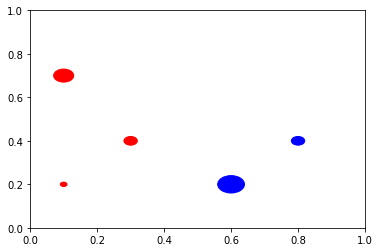

In [3]:
sys.path.append('../../../../../geometry/python/')
import meshtools as mt
#
# set number, value and location of source and sink points
# 
Nplus=3
Nminus=2

fplus=[1,2,3]
fminus=[4,2]

xplus=[[0.1,0.2],[0.3,0.4],[0.1,0.7]]
xminus=[[0.6,0.2],[0.8,0.4]]

# set array forcing_dirac "evoluation" f=f^{+}-f^{-} on grid nodes
forcing_dirac=np.zeros(grid.nnode)
for i in range(Nplus):
    inode=mt.Inode(coord,xplus[i])
    forcing_dirac[inode]=fplus[i]
for i in range(Nminus):
    inode=mt.Inode(coord,xminus[i])
    forcing_dirac[inode]=-fminus[i]

# plot location oand intensity of source and sink
ax = plt.gca()
ax.cla() 
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
# some data
for i in range(Nplus):
    print((xplus[i][0],xplus[i][1]))
    circle = plt.Circle((xplus[i][0],xplus[i][1]),0.01*fplus[i], color='red', fill=True)
    ax.add_patch(circle)
for i in range(Nminus):
    circle = plt.Circle((xminus[i][0],xminus[i][1]),0.01*fminus[i], color='blue', fill=True)
    ax.add_patch(circle)
plt.show()

    

# initial integrated forcing term
rhs=np.zeros(subgrid.ncell)
dmk_p1p0.build_subgrid_rhs(subgrid,rhs, np.zeros(ncell),forcing_dirac)

In [4]:
# define transport post function
def kappa(coord):
    x=coord[0]; y=coord[1]
    fvalue=0.1+np.random.random_sample()
    return fvalue;


# compute functions on cell centroids
ncell=len(topol)
bar_cell=mt.make_bar(coord,topol).transpose()
kappa_cell=np.zeros([ncell]);
for i in range(ncell):
    kappa_cell[i] = kappa(bar_cell[:,i])

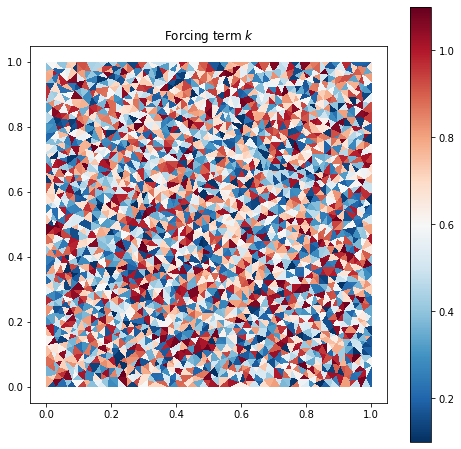

In [5]:
import matplotlib.tri as mtri
#
# plot forcing term
#
triang = mtri.Triangulation(coord.transpose()[0,:], coord.transpose()[1,:], topol)
fig1, ax1 = plt.subplots(figsize=(8, 8)); ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, kappa_cell , cmap='RdBu_r')
fig1.colorbar(tpc)
ax1.set_title('Forcing term $k$')
plt.show()

We load the controls from file. You can either change it in the file or change some controls in the next cell.

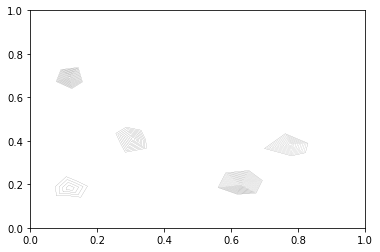

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

In [6]:
# Init and set "container" with inputs for dmk simulation
dmkin=Dmkinputsdata.DmkInputs()
Dmkinputsdata.dmkinputs_constructor(dmkin,0,ntdens,npot,True) # this True set to default all varaibles

# integrate forcing term w.r.t. p1 base function
build_subgrid_rhs(subgrid, dmkin.rhs, np.zeros(grid.ncell),forcing_dirac)
dmkin.pflux = 1.5

In [7]:
# Init "container" variable with tdens(mu) and potential(u) varaible
tdpot=Tdenspotentialsystem.tdpotsys()
Tdenspotentialsystem.tdpotsys_constructor(tdpot,0,ntdens, npot,1)
tdpot.tdens[:]=1.0

In [8]:
# init and set controls
ctrl = Dmkcontrols.DmkCtrl()
Dmkcontrols.get_from_file(ctrl,'dmk.ctrl')
ctrl.fn_tdens='tdens.dat'
ctrl.fn_pot='pot.dat'
ctrl.fn_statistics='dmk.log'

#
# init type for storing evolution/algorithm info
#
timefun=Timefunctionals.evolfun()
Timefunctionals.evolfun_constructor(timefun, 0,
                                        ctrl.max_time_iterations,
                                        ctrl.max_nonlinear_iterations)

# solve with dmk
info=0
dmkp1p0_steady_data(grid, subgrid, tdpot, dmkin, ctrl, info,timefun=timefun)



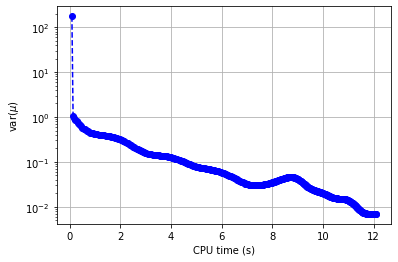

In [9]:
# plot convergence toward steady state
time      = np.array(timefun.time[0:timefun.last_time_iteration]);
cpu_time  = np.array(timefun.cpu_time[0:timefun.last_time_iteration])
var_tdens = np.array(timefun.var_tdens[1:timefun.last_time_iteration])
wass1     = np.array(timefun.lyapunov[1:timefun.last_time_iteration])

plt.figure(1)
plt.yscale('log')
plt.ylabel('var($\mu$)')
plt.xlabel('CPU time (s)')
plt.grid(True)
plt.plot(cpu_time[1:], var_tdens, 'bo--')
plt.show()

(0.1, 0.2)
(0.3, 0.4)
(0.1, 0.7)


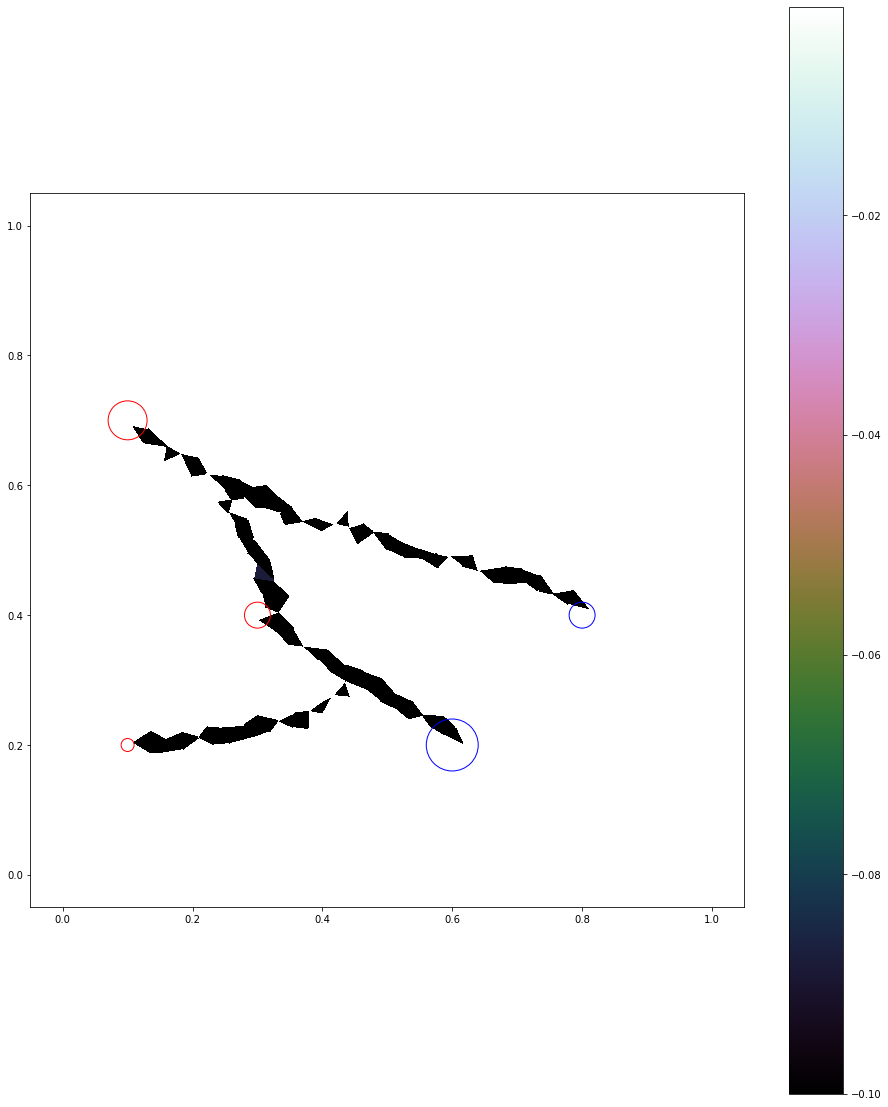

In [10]:
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.set_aspect('equal')
tpc = ax1.tripcolor(triang, -tdpot.tdens, vmin=-1e-1,vmax=-1e-3,   cmap='cubehelix')
#fig1.colorbar(tpc)
#tpc = ax1.tripcolor(triang, dmkin.penalty_weight,   cmap='cubehelix')
fig1.colorbar(tpc)
#tcf = ax1.tricontour(triang, node_net,1)
#fig1.colorbar(tcf)
# some data
for i in range(Nplus):
    print((xplus[i][0],xplus[i][1]))
    circle = plt.Circle((xplus[i][0],xplus[i][1]),0.01*fplus[i], color='red', fill=False)
    ax1.add_patch(circle)
for i in range(Nminus):
    circle = plt.Circle((xminus[i][0],xminus[i][1]),0.01*fminus[i], color='blue', fill=False)
    ax1.add_patch(circle)
plt.show()